## Homework 3
 - ### Release Date: Wednesday, February 26
 - ### Due Date: Monday March 9, 12:00 PM

### Introduction

In this homework, we will use data provided by Capital Bikeshare. The data contains information about usuage of 2500 rental bicycles throughout 300 stations in Washington DC. Through a charge or membership, renters can use the bicycles for a span of time usually 30 minutes to 60 minutes. Since the adoption of rental bicycles in 2010, renters have access to a sustainable means of commuting that reduces congestion and crowding in other modes of transportation. 

We want to understand the usage of bicycles. We will walk through the various steps of exploratory data analysis with you providing insights along the way to give you a sense for each discovery and its implications. We will try to determine the factors that impact rentals such as temperature and precipitation.

As we explore the data, you will gain practice with:
* Grouping records to aggregate numbers  
* Generating histograms, line-charts, scatter-plots
* Assessing distributions of numbers to check for outliers or gaps 

We will guide you through the problems step by step. However, we encourage you to discuss with us in Office Hours and on Piazza so that we can work together through these steps. 

#### Submission Instructions

Submission of homework requires two steps. See **Homework 0** for more information.

##### _Step 1_
You are required to **submit your notebook on JupyterHub**. Please navigate to the `Assignments` tab to  
- fetch
- modify 
- validate
- submit 

your notebook. Consult the [instructional video](https://nbgrader.readthedocs.io/en/stable/user_guide/highlights.html#student-assignment-list-extension-for-jupyter-notebooks) for more information about JupyterHub.

##### _Step 2_
You are required to **submit a copy of your notebook to Gradescope**. Follow these steps

##### _Formatting Instructions_


1. Download as HTML (`File->Download As->HTML(.html)`). 
1. Open the HTML in the browser. Print to .pdf 
1. Upload to Gradescope. Consult the [instructional video](https://www.gradescope.com/get_started#student-submission) for more information about Gradescope. 
1. Indicate the location of your responses on Gradescope. You must tag your answer's page numbers to the appropriate question on Gradescope. See instructional video for more information.

Note that 

- You should break long lines of code into multiple lines. Otherwise your code will extend out of view from the cell. Consider using `\` followed by a new line. 
- For each textual response, please include relevant code that informed your response. 
- **For each plotting question, please include the code used to generate the plot. If your plot does not appear in the HTML / pdf output, then use `Image('name_of_file', embed = True)` to embed it.**
- You should not display large output cells such as all rows of a table. 

**Important**: Gradescope points will be awarded if and only if all the formatting instructions are followed. 

#### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Name:** Richie Doherty

**NetId:** rd2414

**Collaborators:** Madi Perez

#### Rubric


Question | Points
--- | ---
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 2a | 2
Question 2b | 2
Question 2c | 2
Question 2d | 2
Question 3a | 4
Question 3b | 3
Question 4a | 2
Question 4b | 2
Question 5a | 1
Question 5b | 4
Question 5c | 1
Total | 30

To start the assignment, run the cell below to set up some imports. In many of these assignments (and your future adventures as a data scientist) you will use `pandas`, `numpy` and `matplotlib.pyplot`. Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np` and `plt`).  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some parameters in the packages 
%matplotlib inline

sns.set(font_scale=1.5)

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.dpi'] = 150

pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15

# Some packages to help with configuration
import os, sys
from IPython.display import display, Latex, Markdown, Image

In [2]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'seaborn' in sys.modules and "sns" in locals()

### 0: Loading Bike Sharing Data <a name="q0"></a>

The data we are exploring is data on bike sharing in Washington D.C. The columns in the table are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Set the location of the data

In [3]:
home_path = os.environ["HOME"]
data_path = f'{home_path}/shared/HW3/data/bikeshare.txt'
img_path = f'{home_path}/shared/HW3/images'

In [4]:
# TEST 

assert "home_path" in locals()
assert 'data_path' in locals()
assert 'img_path' in locals()

### Question 0 

We want to examine the file contents. Remember from Week 5 Lecture 2 that we can use commands to access a file without reading it into memory. Try running the following commands to 

- check the size of the file
- determine the file format
- count the number of lines in the dataset 
- view the first 10 lines of the data

Note that you do not need to provide your answers. 

#### Question 0a (File Size)
How many kilobytes is the file?

In [5]:
!du -sh $data_path 

1.1M	/home/jovyan/shared/HW3/data/bikeshare.txt


#### Question 0b (File Type)
What is the file type?

In [6]:
!file $data_path

/home/jovyan/shared/HW3/data/bikeshare.txt: ASCII text


#### Question 0c (Number of Lines)
How many lines in the file?

In [7]:
!wc -l $data_path

17380 /home/jovyan/shared/HW3/data/bikeshare.txt


#### Question 0d (Content)
Print the first five rows of the file.

In [8]:
!head $data_path

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8


### Loading the data

The following code loads the data into a Pandas DataFrame.

In [9]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv(data_path)
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,...,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,...,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,...,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,...,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,...,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,...,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the dataframe matches the number of lines in the file, minus the header row.

In [10]:
bike.shape

(17379, 17)

---
### 1: Data Preparation

#### Question 1

Four of the columns in the table use numbers as categorical data. We will convert these entries to strings indicating the categories. 
 - `holiday`
     * `Sun`
     * `Mon`
     * `Tue`
     * `Wed`
     * `Thu`
     * `Fri`
     * `Sat`
 - `weekday`
     * `yes`
     * `no`
 - `workingday` 
     * `yes`
     * `no`
 - `weathersit`
     * `Clear`
     * `Mist`
     * `Light`
     * `Heavy`




#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Convert the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  
1. `weekday`: Convert to `'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'`. Note `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: Convert to `Clear`, `Mist`, `Light`, or `Heavy`.

Note if you want to revert the changes run the cell above that loads the file.

Try using the `replace` method. You need to pass a dictionary where the key is the number and the value is the corresponding string. For example

```python 
bike["holiday"].replace({0:'no', 1:'yes'}, inplace = True)
```

In [11]:
# convert numbers to strings in `holiday`, `weekday`, `workingday`, and `weathersit`

bike["holiday"].replace({0:'no', 1:'yes'}, inplace = True)
bike['weekday'].replace({0: 'Sun', 1 : 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}, inplace = True)
bike['workingday'].replace({0:'no', 1:'yes'}, inplace = True)
bike['weathersit'].replace({1: 'Clear', 2 :'Mist', 3 : 'Light', 4: 'Heavy'}, inplace = True)
bike['weathersit'].unique()
# YOUR CODE HERE
#raise NotImplementedError()

array(['Clear', 'Mist', 'Light', 'Heavy'], dtype=object)

In [12]:
# TEST 
assert isinstance(bike, pd.DataFrame)
assert bike['holiday'].dtype == np.dtype('O')
assert list(bike['holiday'].iloc[370:375]) == ['no', 'no', 'yes', 'yes', 'yes']
assert bike['weekday'].dtype == np.dtype('O')
assert bike['workingday'].dtype == np.dtype('O')
assert bike['weathersit'].dtype == np.dtype('O')


#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [13]:

num_holidays = len(bike[(bike["holiday"] == 'yes')])
len(bike[(bike["holiday"] == 'yes')])
# YOUR CODE HERE
#raise NotImplementedError()

500

In [14]:
# TEST 
assert 400 <= num_holidays <= 550


#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute at the daily level.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

Use `groupby` and `agg`. For a reminder about the `agg` method, you can check the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html). Remember that we can have different aggregations in each column by passing a dictionary. 

For `casual` column and `registered` column you need to take a `sum`. For the `workingday` column, you can take any of the values since we are grouping by the day. Try using the function `select_first_row` from Week 4. 

In [15]:
def select_first_row(some_series):
    return some_series[0]


daily_counts = bike.groupby('dteday').agg({'casual': 'sum' ,'registered' : 'sum' ,'workingday' : select_first_row})
daily_counts
# YOUR CODE HERE
#raise NotImplementedError()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes
...,...,...,...
2012-12-27,247,1867,yes
2012-12-28,644,2451,yes
2012-12-29,159,1182,no


In [16]:
# TESTS
assert np.round(daily_counts['casual'].mean()) == 848.0
assert np.round(daily_counts['casual'].var()) == 471450.0


---
## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 2
#### Question 2a

Use [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) function to create a chart containing two normalized historgrams. Remember that normalized means we divide by the size of the data to get frequencies instead of counts. Here the frequencies for `casual` and `registered` should be in the same figure. 

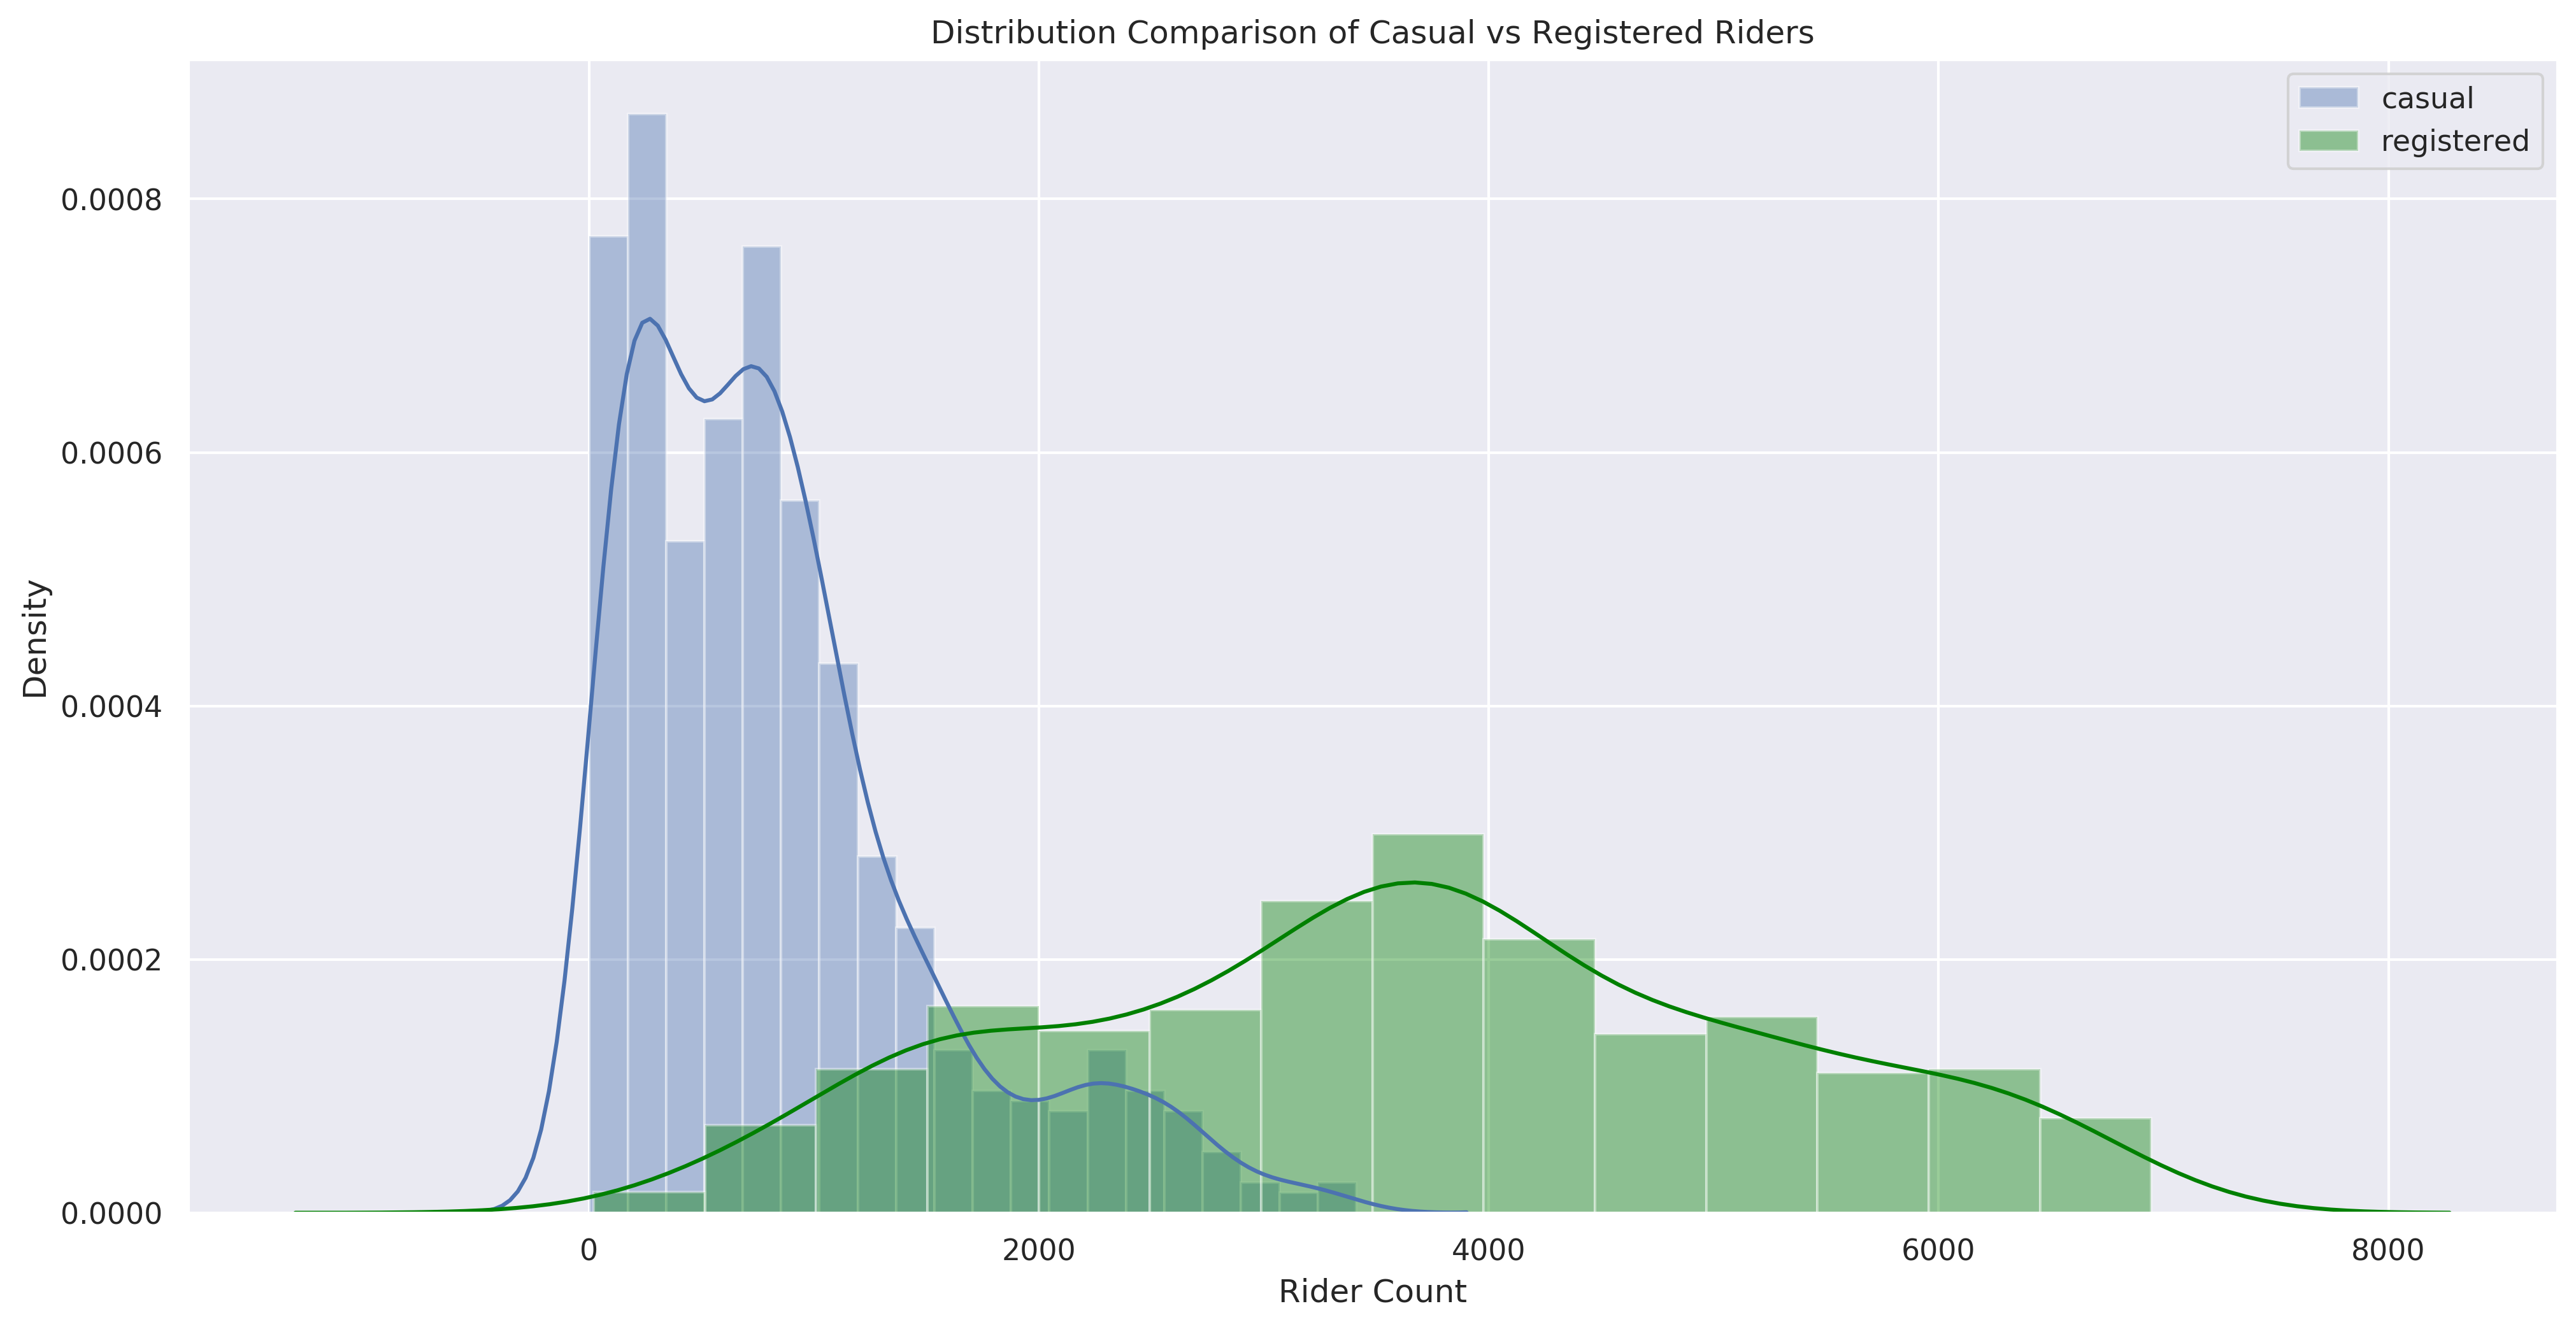

In [17]:
Image(filename=f'{img_path}/casual_v_registered.png', embed=True, height=10, width=700)

Following Question 1c, the granularity of the records should be at the daily level. Please include a legend, xlabel, ylabel, and title. You can check the [documentation](https://seaborn.pydata.org/tutorial/distributions.html) for more information. 

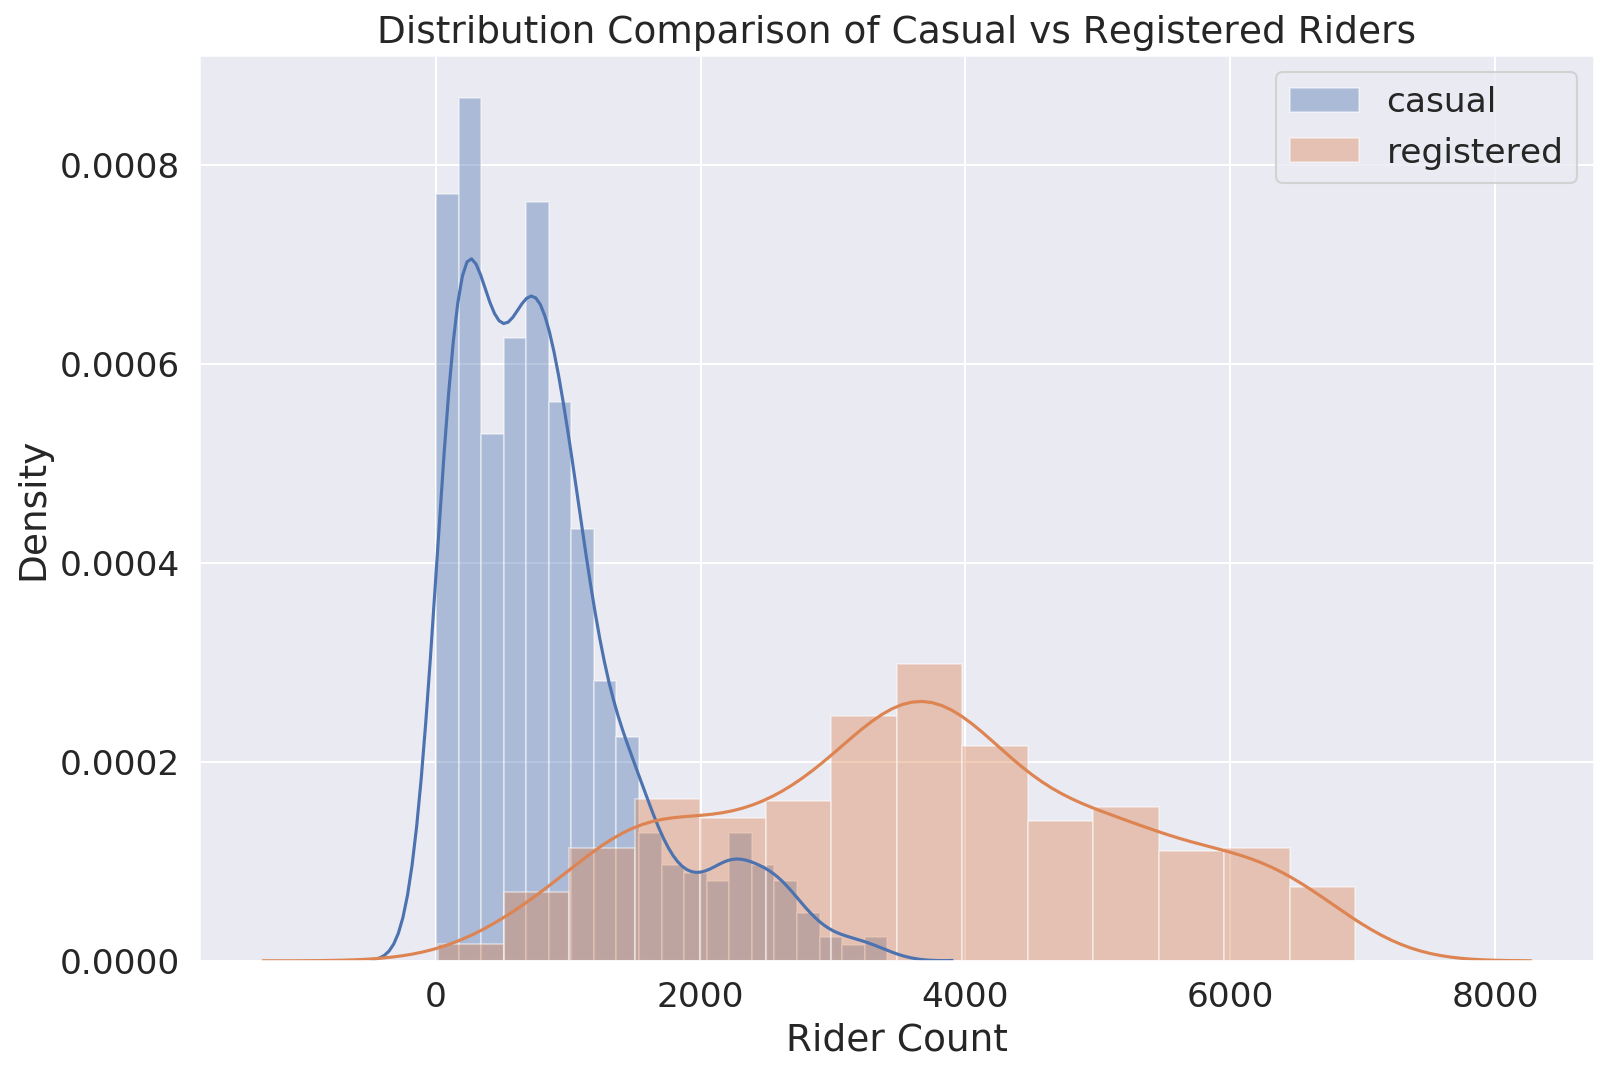

In [18]:
# generate the histograms
casual = daily_counts["casual"] 
registered = daily_counts['registered']
ax = sns.distplot( casual, hist = True, norm_hist = True)
ax = sns.distplot(registered, hist = True, norm_hist = True)
ax.set_title("Distribution Comparison of Casual vs Registered Riders")
ax.set_ylabel("Density")
ax.set_xlabel("Rider Count")
ax.legend(labels = ['casual', 'registered'])
# YOUR CODE HERE
#raise NotImplementedError()

### Question 2b

After creating the plot in Question 2a, we want to study it. What is the chart telling us? For example, on a given day, the most likely number of registered riders is about 4000, but it could be anywher from about 0 to 7000.

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. Save your answer in the variable `q2b` as a string.

In [19]:
q2b = """
The causal riders has less variation in their daily count distribution than the registered rider have in their distribution. 
The skew of the causal rider is right tailed, meaning there are a few outlying riders are going to drag the mean to the right of the median.
The registered rider is relativilty normal. It is centered around 4000 riders,
and has a normal spread of daily rider counts that varies evenly from the center of the distribution
"""

# YOUR CODE HERE
#raise NotImplementedError()

In [20]:
# TESTS
for keyword in ['distribution', 'skew', 'spread', 'center']:
    assert keyword in q2b

### Question 2c

The histograms do not show us the changes in registered and casual riders together across the different days. Use [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)  to make a scatter plot to investigate the relationship between casual and registered counts. 

-  Color the points in the scatterplot according to whether or not the day is working day. Set `hue="workingday"`
-  There are many points in the scatter-plot. You can make them small to help with over-plotting. Set `s = 20`
- You will need to set `x` and `y` for `casual` and `registered`

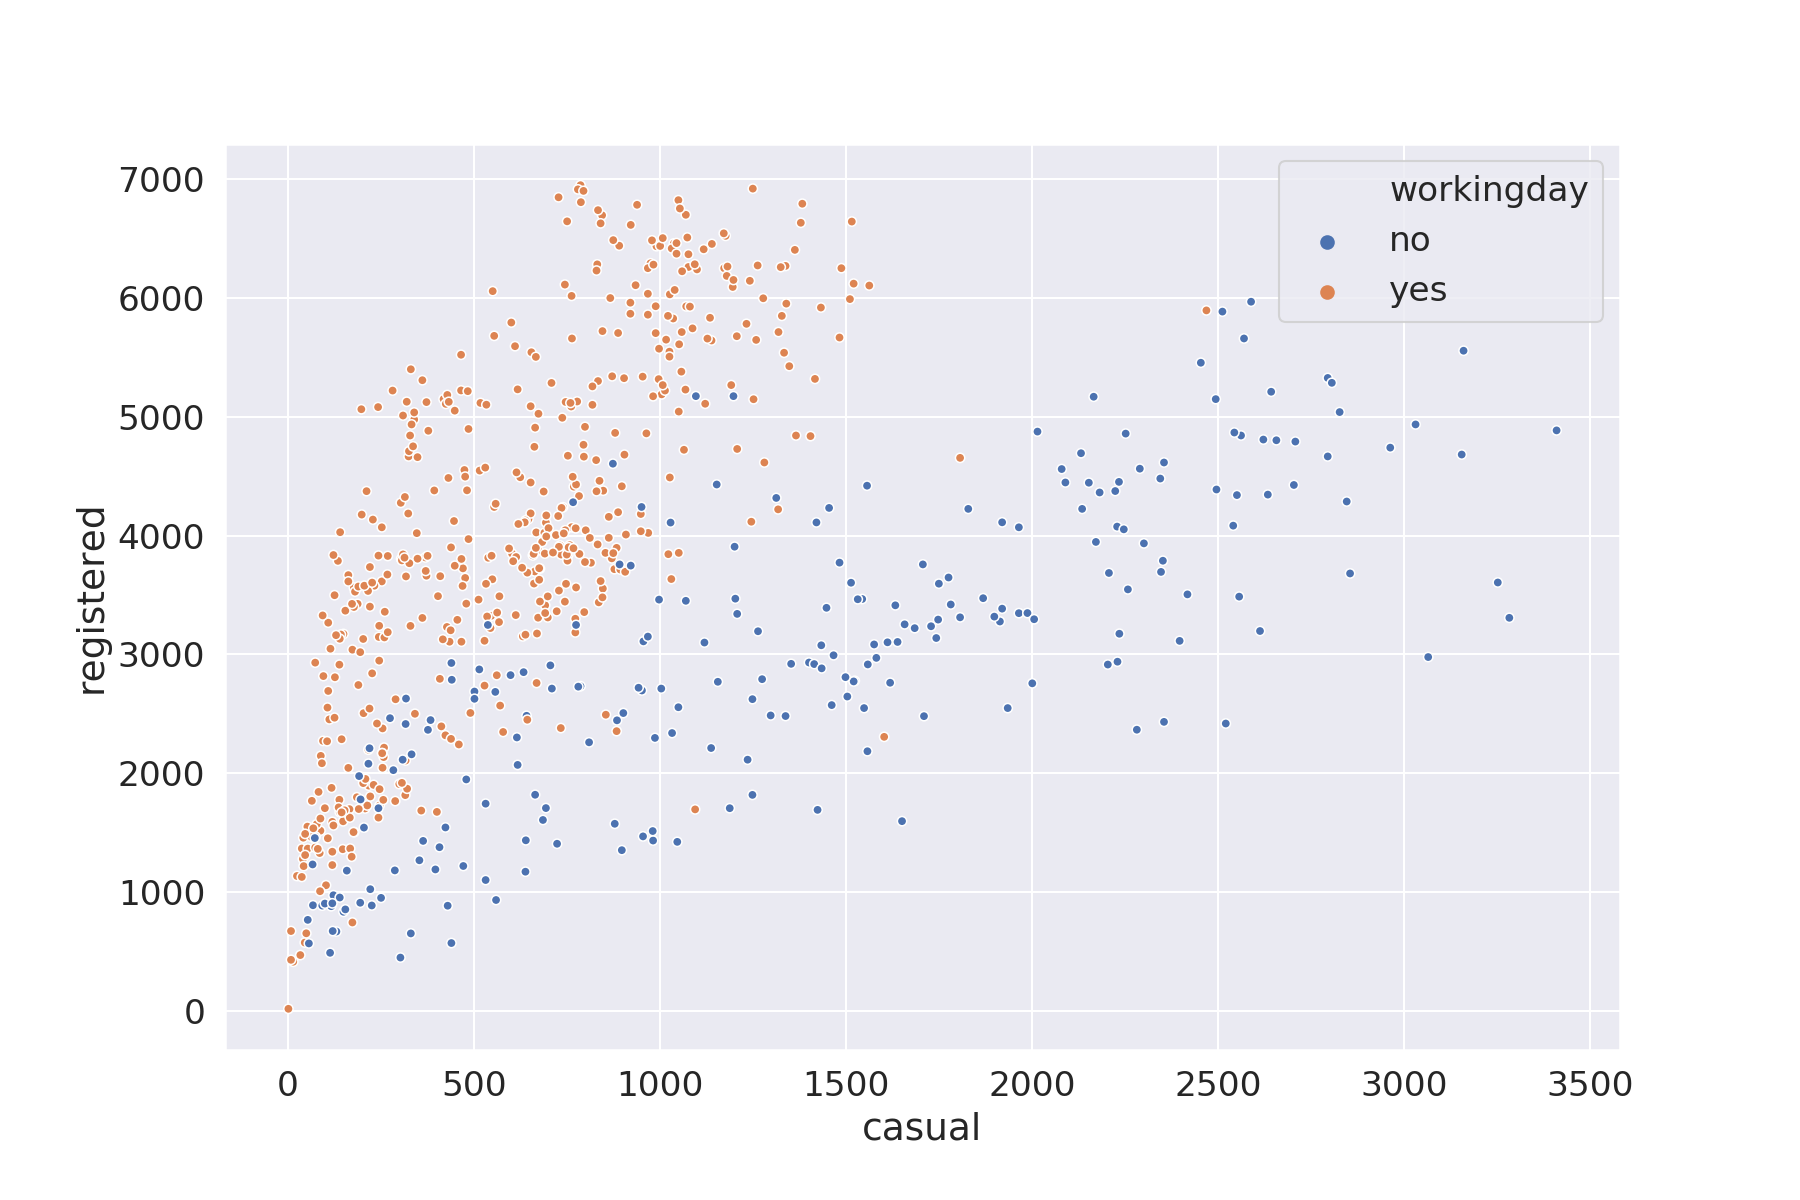

In [21]:
Image(filename=f'{img_path}/casual_registered_working_nonworking.png', embed=True, height=10, width=700)

Text(0.5, 0, 'Casual Rider Count')

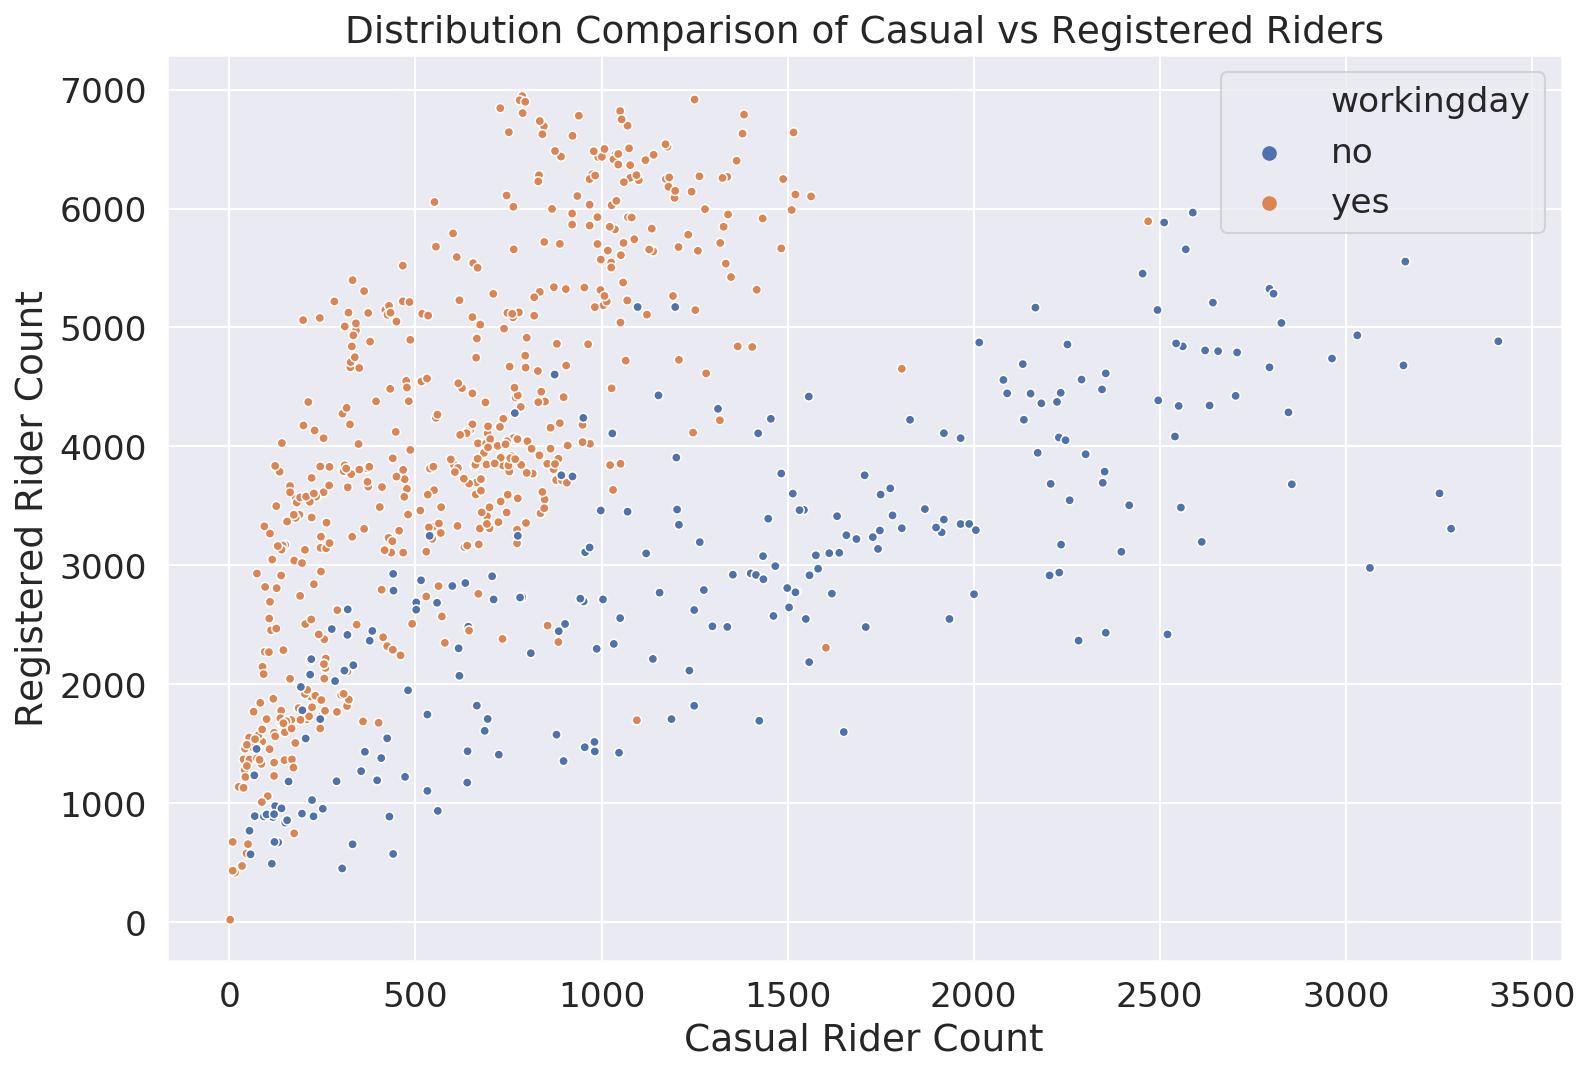

In [22]:
# generate the scatter-plot
workingday = daily_counts['workingday']
ax = sns.scatterplot(x = casual, y = registered, hue = workingday, s = 20)
ax.set_title("Distribution Comparison of Casual vs Registered Riders")
ax.set_ylabel("Registered Rider Count")
ax.set_xlabel("Casual Rider Count")
# YOUR CODE HERE
#raise NotImplementedError()

### Question 2d

What does this scatterplot seem to reveal about the relationship between casual and registered riders.  How does the relationship change whether it is the weekend?

Why might we be concerned with overplotting in examining this relationship? By "overplotting", we're referring to the term used in chapter 6.5 of the [textbook](http://www.textbook.ds100.org/ch/06/viz_principles_2.html).

Save your answer in the variable `q2d` as a string.

In [23]:
q2d = """
The relationship between casual and registered riders is linear. 
It seems that there is a correlation between the the amount a riders rides and the status of their registration.
The strength and the slope of the linear relationship changes depending on it if is a work day or a weekend.
We may be concerned with overplotting because there is overlap in some of the count instances. 
We may want to decrease the sample size to see a more differences or we can jitter the results
"""

# YOUR CODE HERE
#raise NotImplementedError()

In [24]:
# TESTS
for keyword in ['linear', 'correlation', 'casual', 'registered', 'work', 'day', 'overplotting']:
    assert keyword in q2d

In [25]:
bike.hr.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

### 3: Exploring Ride Sharing and Time

#### Question 3

We want to understand the patterns of casual and registered riders over time.

#### Question 3a

Let us plot average number of riders per hour for each day in the month of June in 2011. Along the horizontal axis we will have the day of the month. Along the vertical axis we will have the average number of riders across the different hours of the day.

We will use the `bike` dataframe with the function `sns.lineplot`. Remeber that the `bike` dataframe has granularity at the hourly level. We will use `sns.lineplot` to plot the `day` column against the `casual` column and the `registered` column. Since each day has 24 hours, we have 24 possible numbers to associate with the day. By default, the function `sns.lineplot`will take an average of the numbers. 

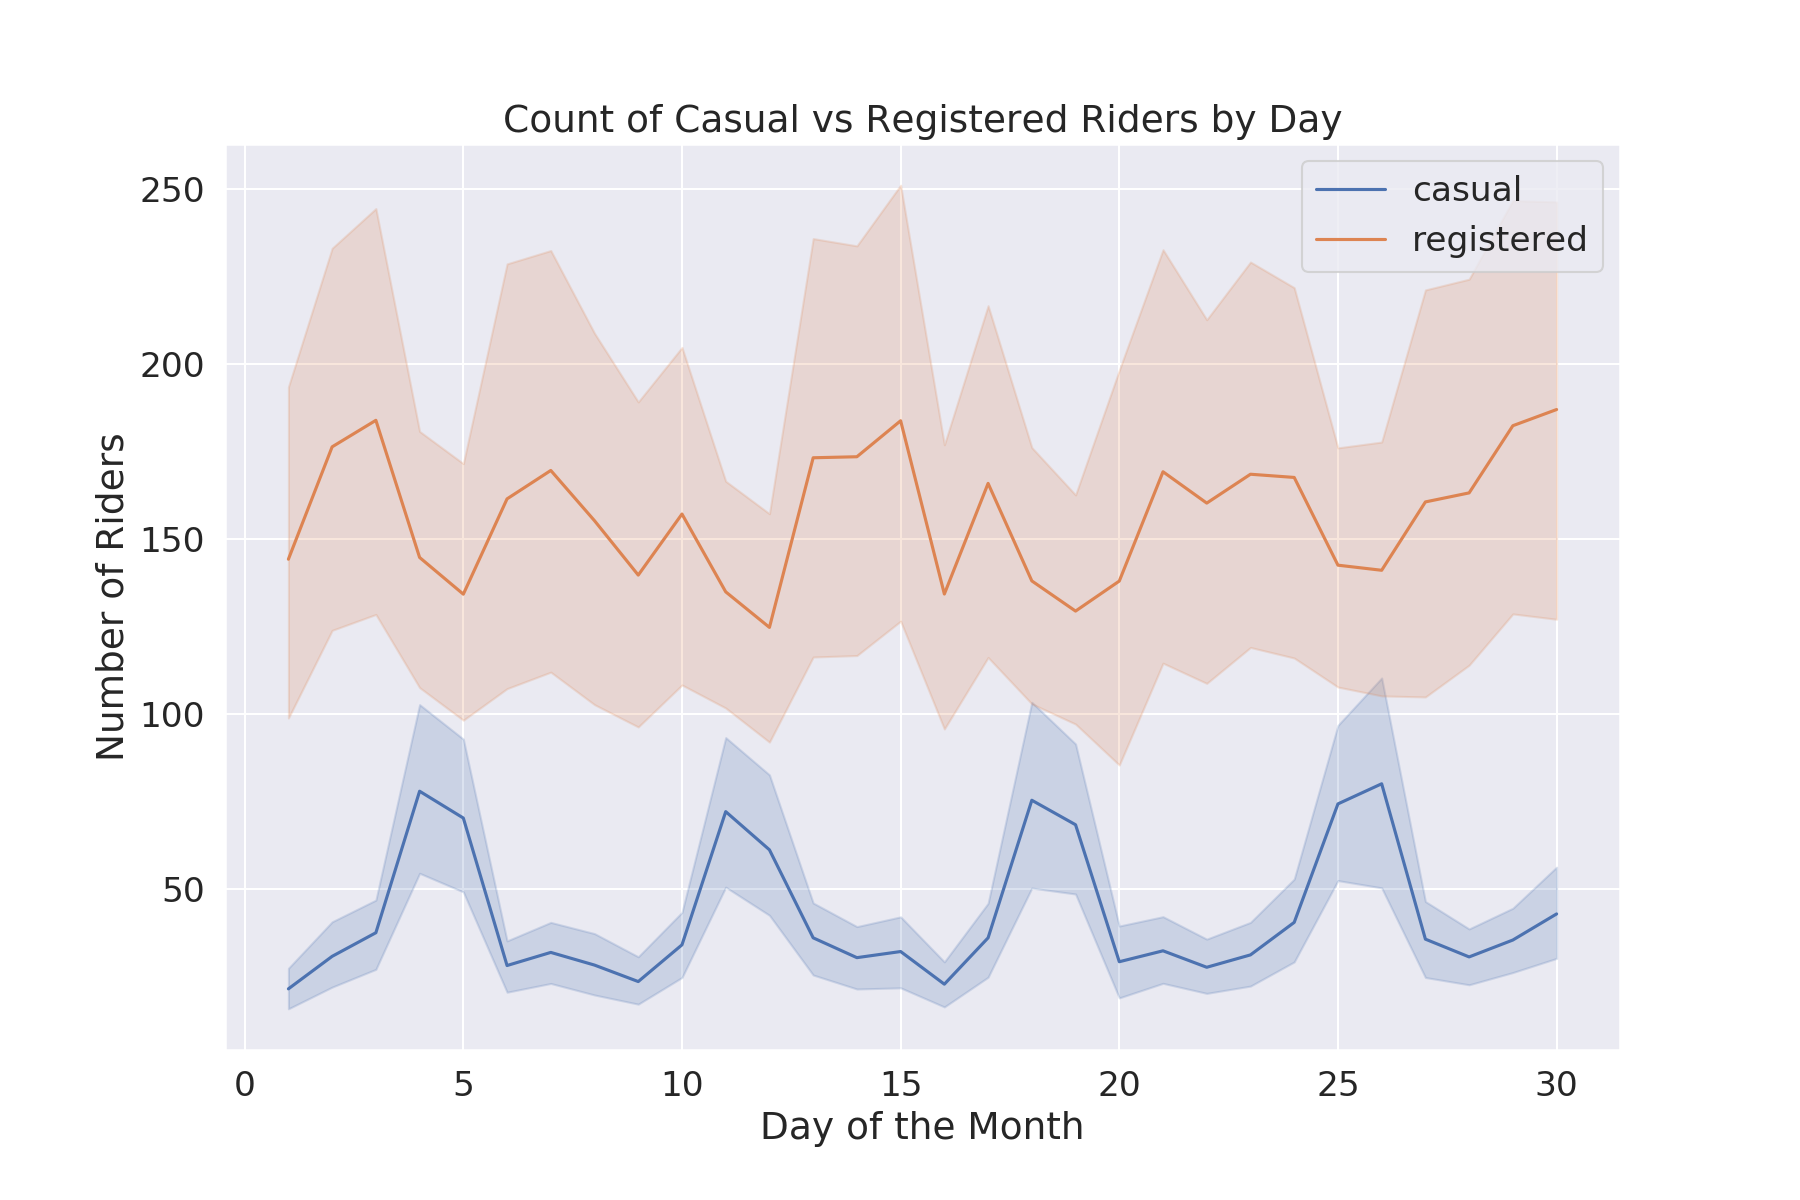

In [26]:
Image(filename=f'{img_path}/june_riders.png', embed=True, height=10, width=700)

On some days the number of riders will vary a lot over the hours. Other days the number of riders will vary a little over the hours. Later in the semester, we will learn to bound the variations of numbers with **confidence intervals**. Intuitively, we should think that

- large confidence interval means the data is spread out
- small confidence interval means the data is not spread out

In the plot, the shading around the lines are the confidence intervals for each day.

In [27]:
def extract_day(some_string):
    return int(some_string[-2:])

Follow these steps to produce the chart.

1. Create a table consisting of the riders in June 2011
    - You need to filter the rows by `yr` equals 0 and `mnth` equals 6
    - Should should copy the filtered table. Try using the `copy` method
1. Extract the day from the `dteday` column
   - We have provided you a function called `extract_date`. Use it with `apply` to obtain the day as a number.
1. Use `sns.lineplot` to plot casual and registered riders 
   - Include xlabel, ylabel, legend, title in the figure
   - To answer the question about confidence intervals look at the shading around the line.
   

/opt/conda/envs/dsua-112/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


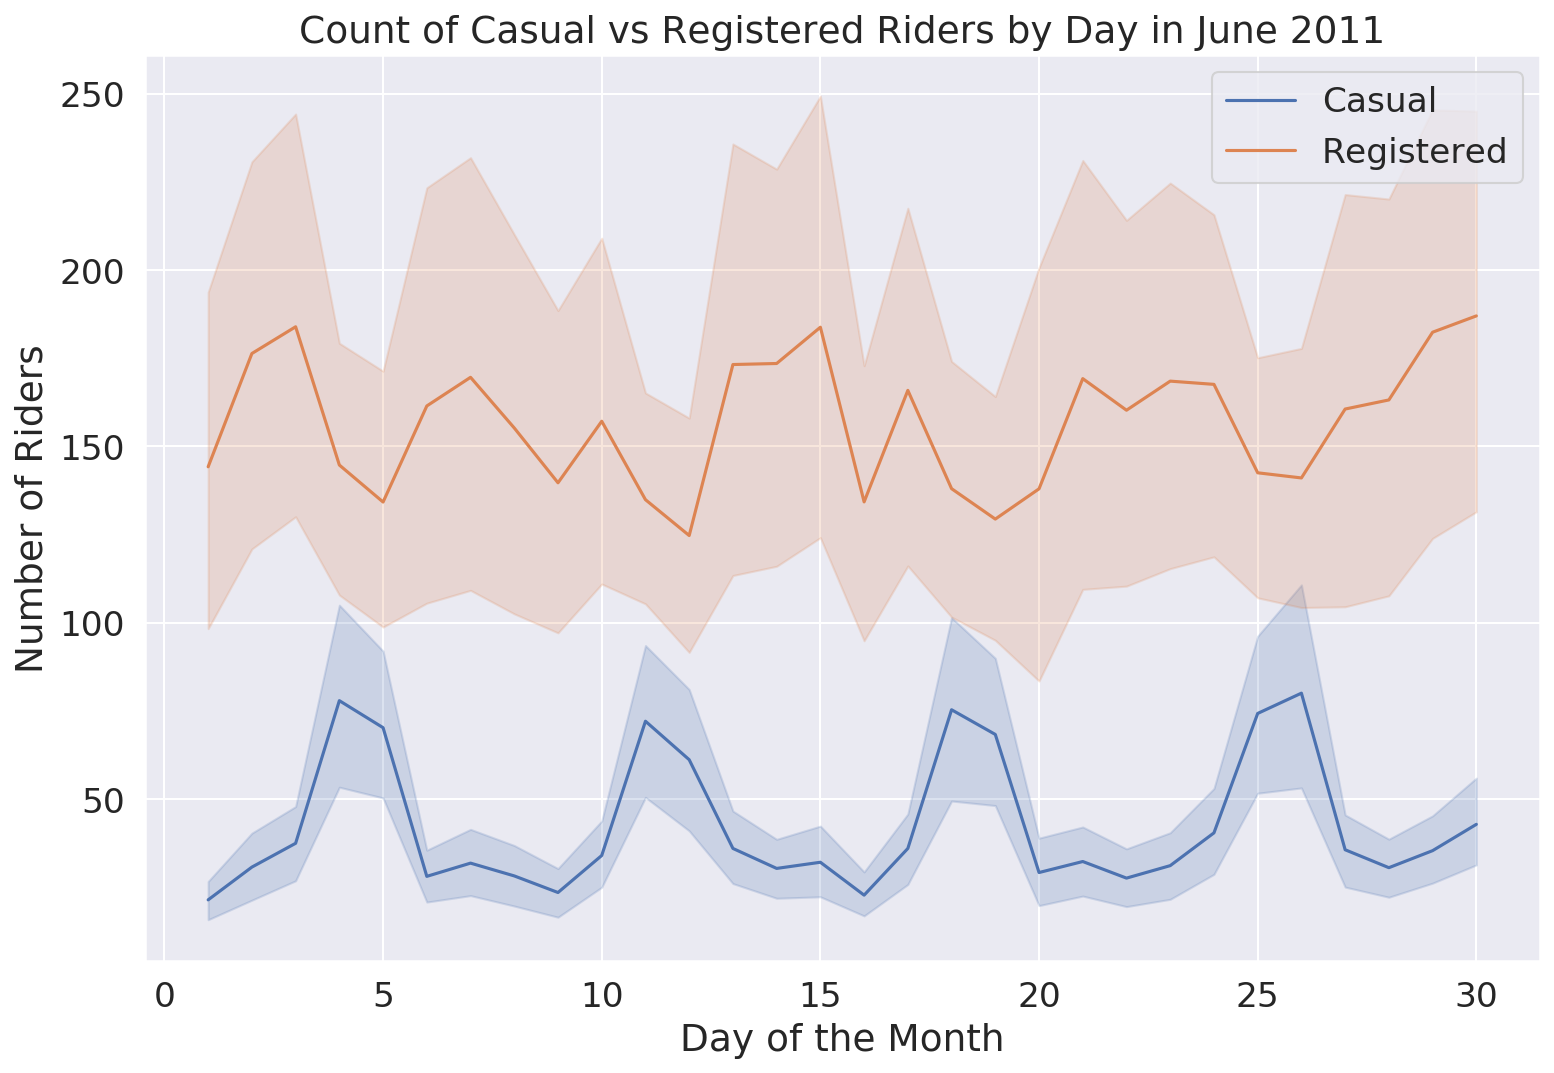

In [28]:
bike_june_2011 = bike[(bike['yr'] == 0) & (bike['mnth'] == 6)]
bike_june_2011['day'] = bike_june_2011['dteday'].apply(extract_day)
ax = sns.lineplot(x = 'day', 
                  y = 'casual', 
                  data = bike_june_2011)
ax = sns.lineplot(x = 'day', 
                  y = 'registered', 
                  data = bike_june_2011)
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Number of Riders')
ax.set_title('Count of Casual vs Registered Riders by Day in June 2011')
ax.legend(labels = ['Casual', 'Registered'])
#bike.head()
# YOUR CODE HERE
#raise NotImplementedError()

#### Question 3b

This plot has several interesting features. 

- How does the number of casual riders compare to that of registered riders? 
- Is there a temporal pattern? 

Please select your answers among the provide answers. Save them as a dictionary in the variable `q3b`. 

In [29]:
q3b = {
    'overall number of riders': 'casual riders are less than the registered riders',
    'day-of-week pattern for casual riders': 'exists',
    'confidence interval for casual riders': 'smaller than that of registered riders'
}

# YOUR CODE HERE
#raise NotImplementedError()

In [30]:
# TESTS
assert q3b['overall number of riders'] in [
    'casual riders are less than the registered riders',
    'casual riders are more than the registered riders',]
assert q3b['day-of-week pattern for casual riders'] in ['exists', 'does not exist',]
assert q3b['confidence interval for casual riders'] in [
    'smaller than that of registered riders',
    'larger than that of registered riders',]


## 4: Understanding Daily Patterns

### Question 4

Having studied the rentals at the daily level, let us try to investigate trends throughout the day at the hourly level.

#### Question 4a
We want to plot the average number of riders for each hour of the day. Moreover, we want to stratify by casual and registered. Note that we are **not** limiting to June 2011 like in Question 3a.  

Please use `groupby` with the `hr` column to generate the data for `sns.lineplot`.

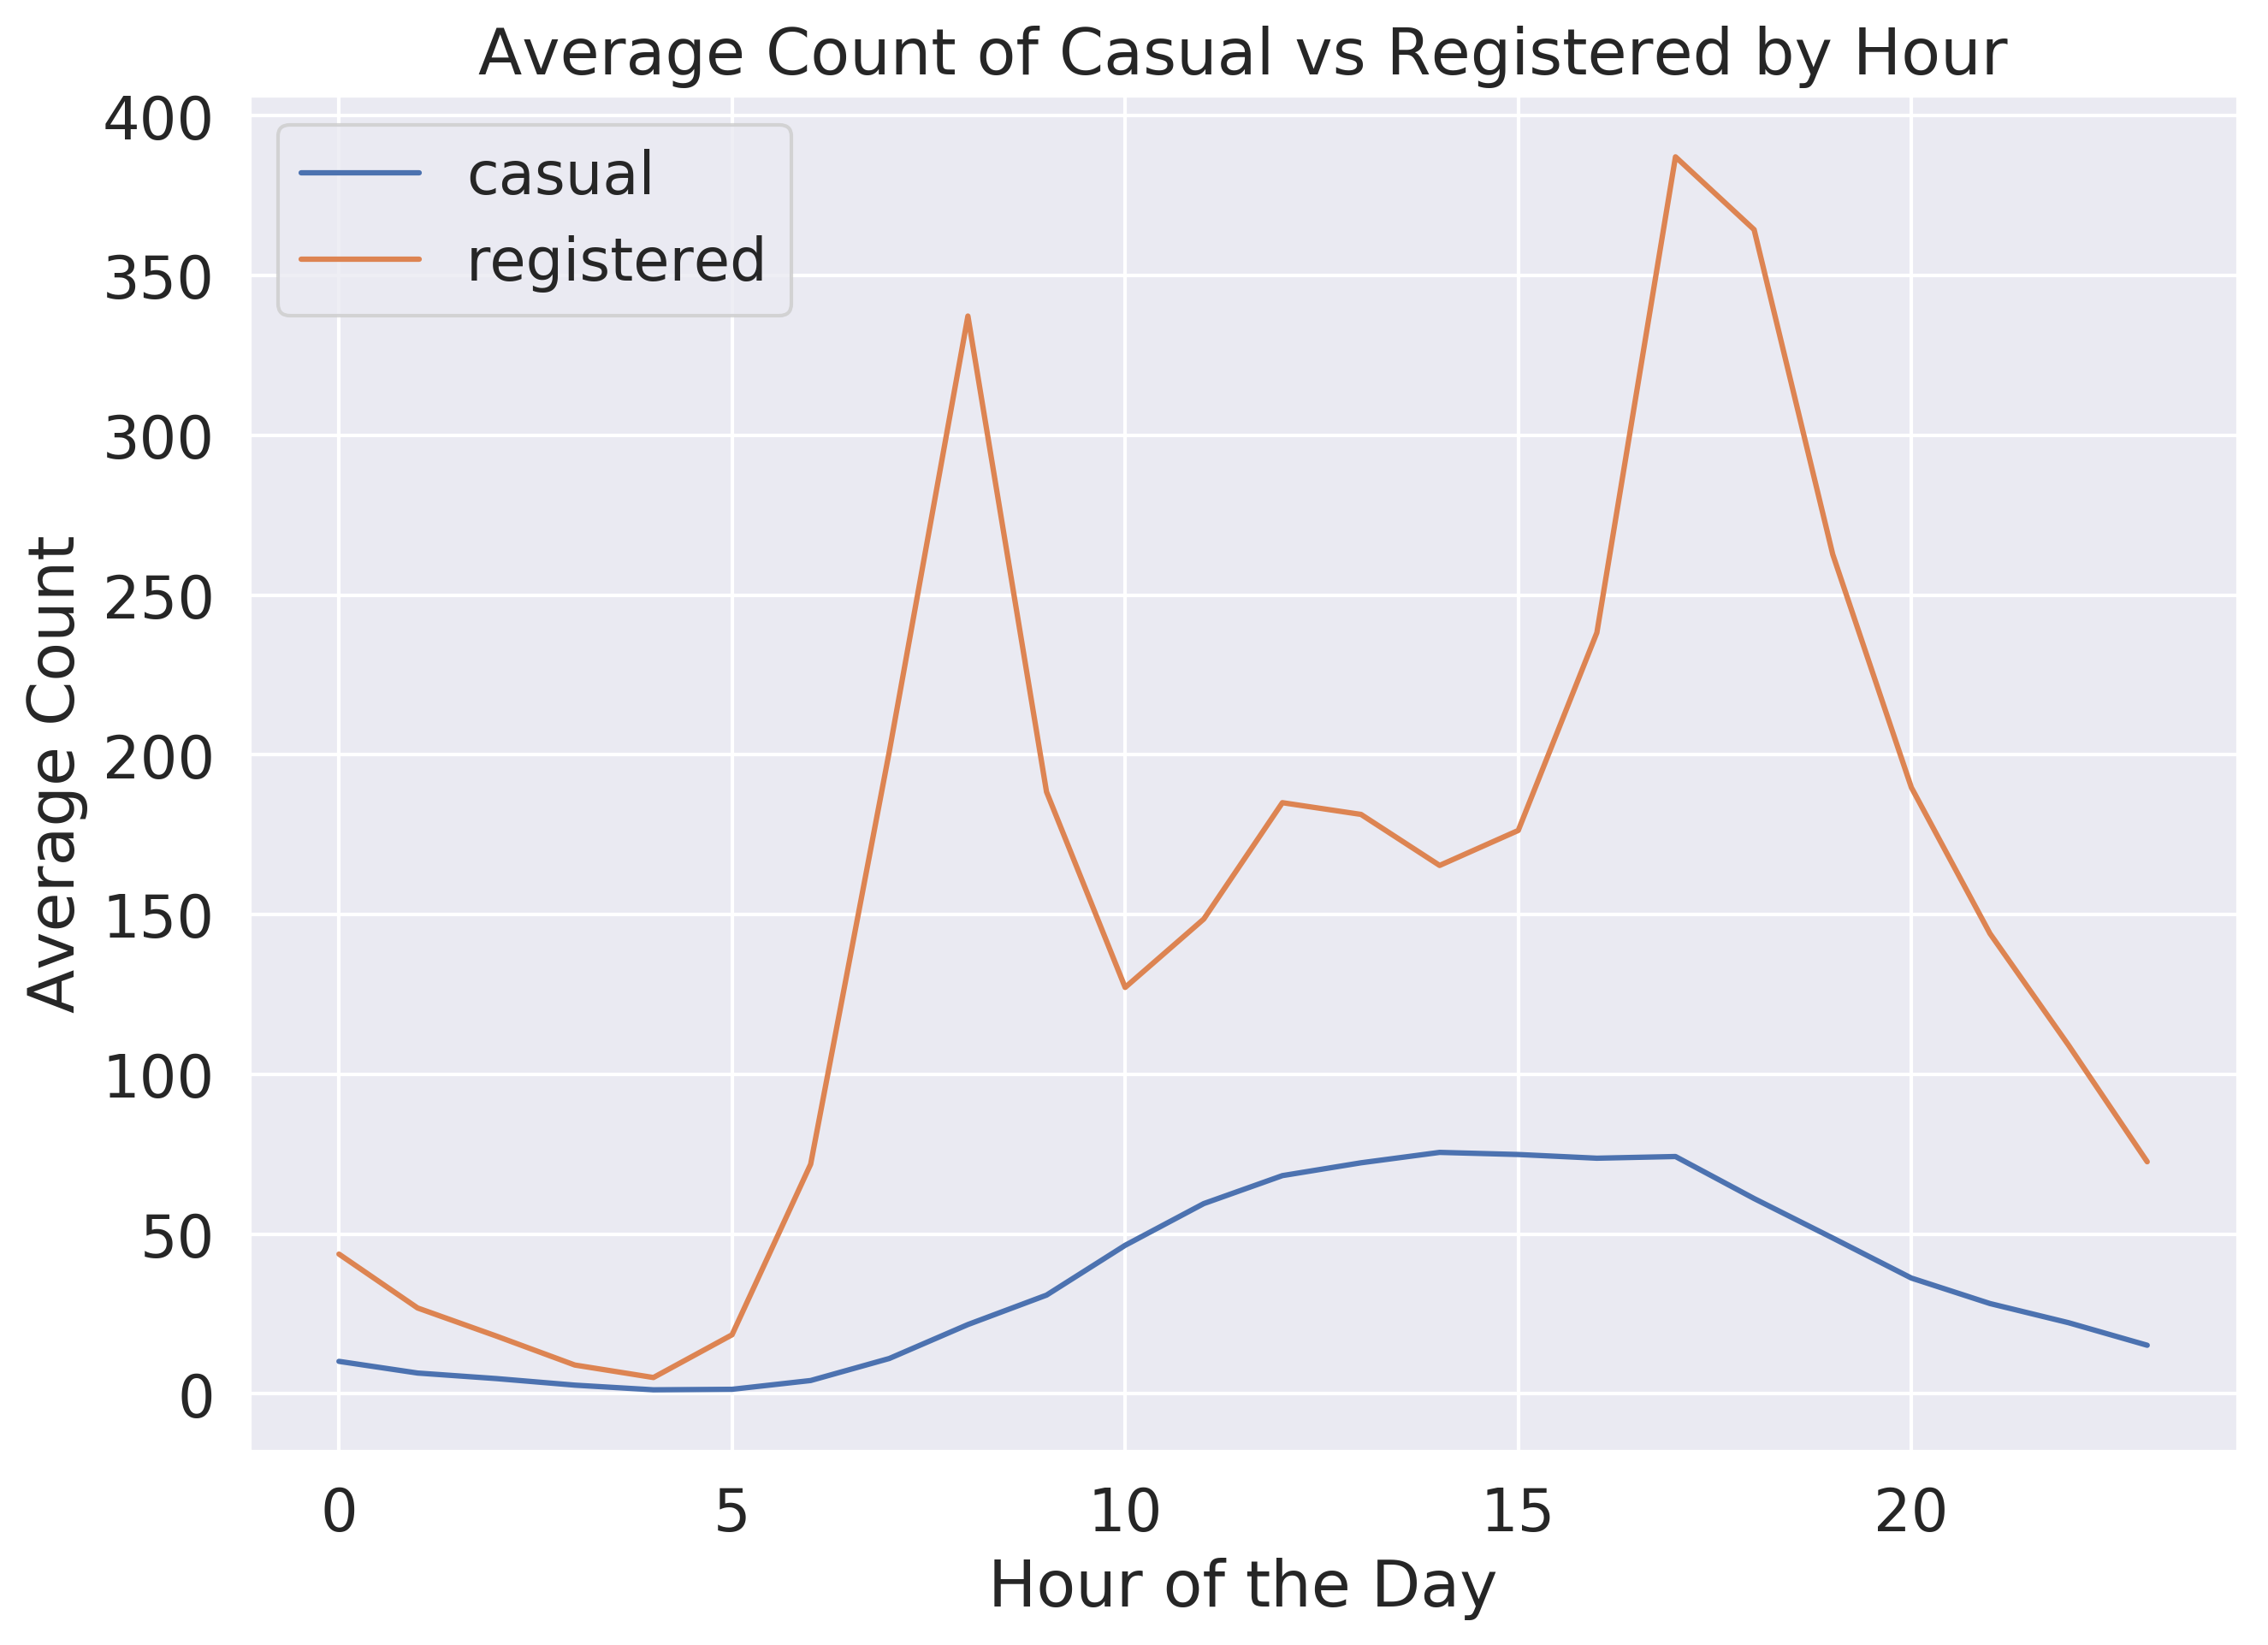

In [31]:
Image(filename=f'{img_path}/diurnal_bikes.png', embed=True, height=10, width=700)

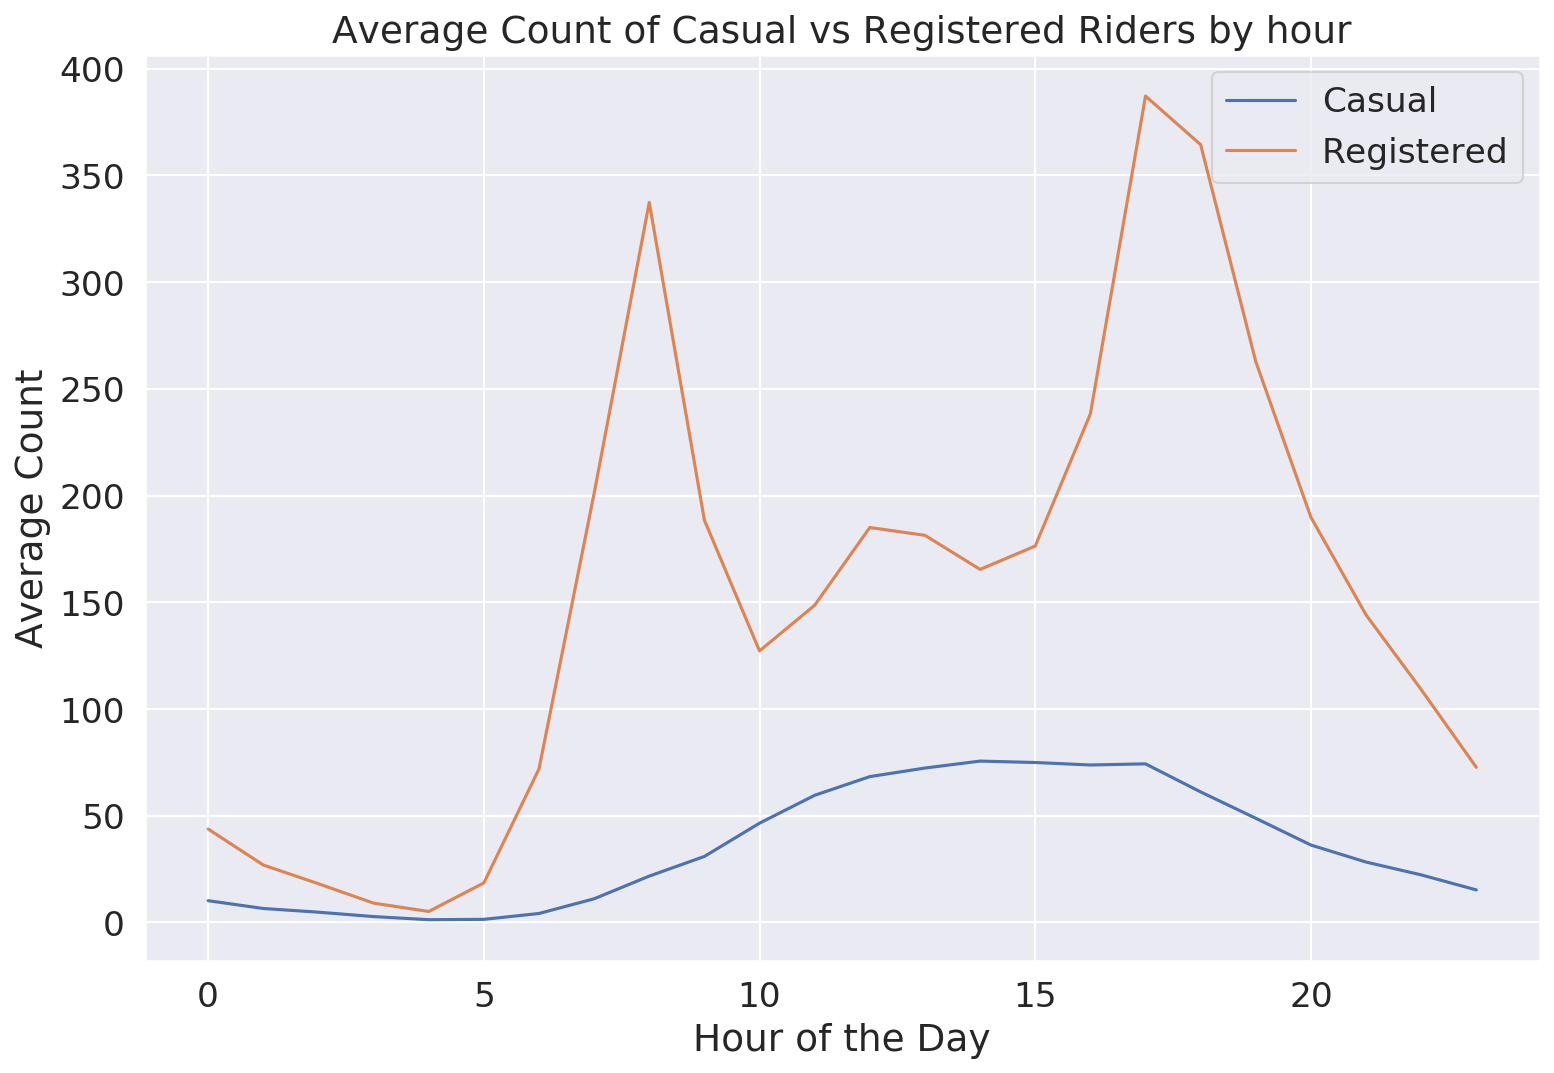

In [32]:
# group by hour to take the average.
bike_hour = bike.groupby(['hr']).mean()
ax = sns.lineplot(x = bike_hour.index, 
                  y = 'casual', 
                  data = bike_hour)
ax = sns.lineplot(x = bike_hour.index, 
                  y = 'registered', 
                  data = bike_hour)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Count')
ax.set_title('Average Count of Casual vs Registered Riders by hour')
ax.legend(labels = ['Casual', 'Registered'])

# YOUR CODE HERE
#raise NotImplementedError()

#### Question 4b

What can you observe from the plot? Save your answers in the dictionary variable below. Answers should be boolean (either `True` or `False`)

In [33]:
q4b = {
    'hourly pattern exist for casual riders': False,
    'hourly pattern exist for registered riders': True,
    'distribution looks unimodal for casual riders': True,
    'distribution looks unimodal for registered riders': False,
    'distribution for the casual riders includes strong spikes': False,
    'distribution for the registered riders includes strong spikes': True
}

# YOUR CODE HERE
#raise NotImplementedError()

In [34]:
# TESTS
assert len(q4b) == 6
for k, v in q4b.items():
    assert isinstance(v, bool)


### 5: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 5

#### Question 5a
Create a new column `prop_casual` in the `bike` dataframe representing the proportion of casual riders out of all riders.

In [35]:
# add `prop_casual` to the table
bike['prop_casual'] = bike['casual'] / bike['cnt']
# YOUR CODE HERE
#raise NotImplementedError()

In [36]:
# TESTS
assert int(bike["prop_casual"].sum()) == 2991


#### Question 5b
In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a messy chart.

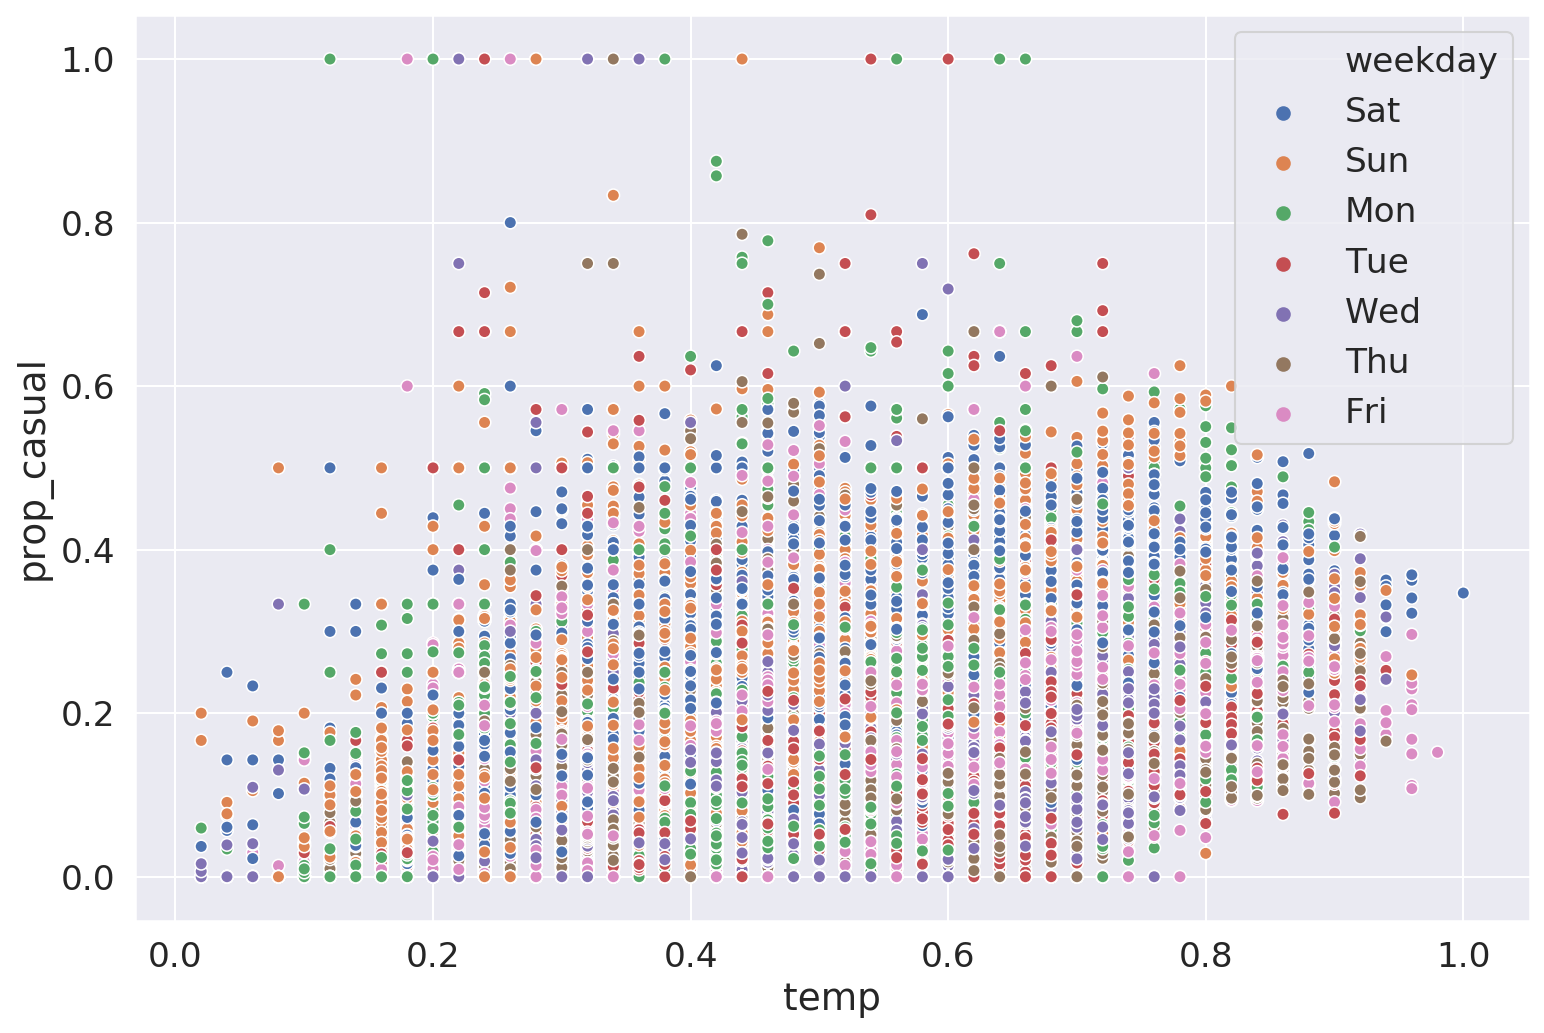

In [37]:
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

Instead we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be some version of the proportion of casual riders. We want to remove the underlying scatter-plot.

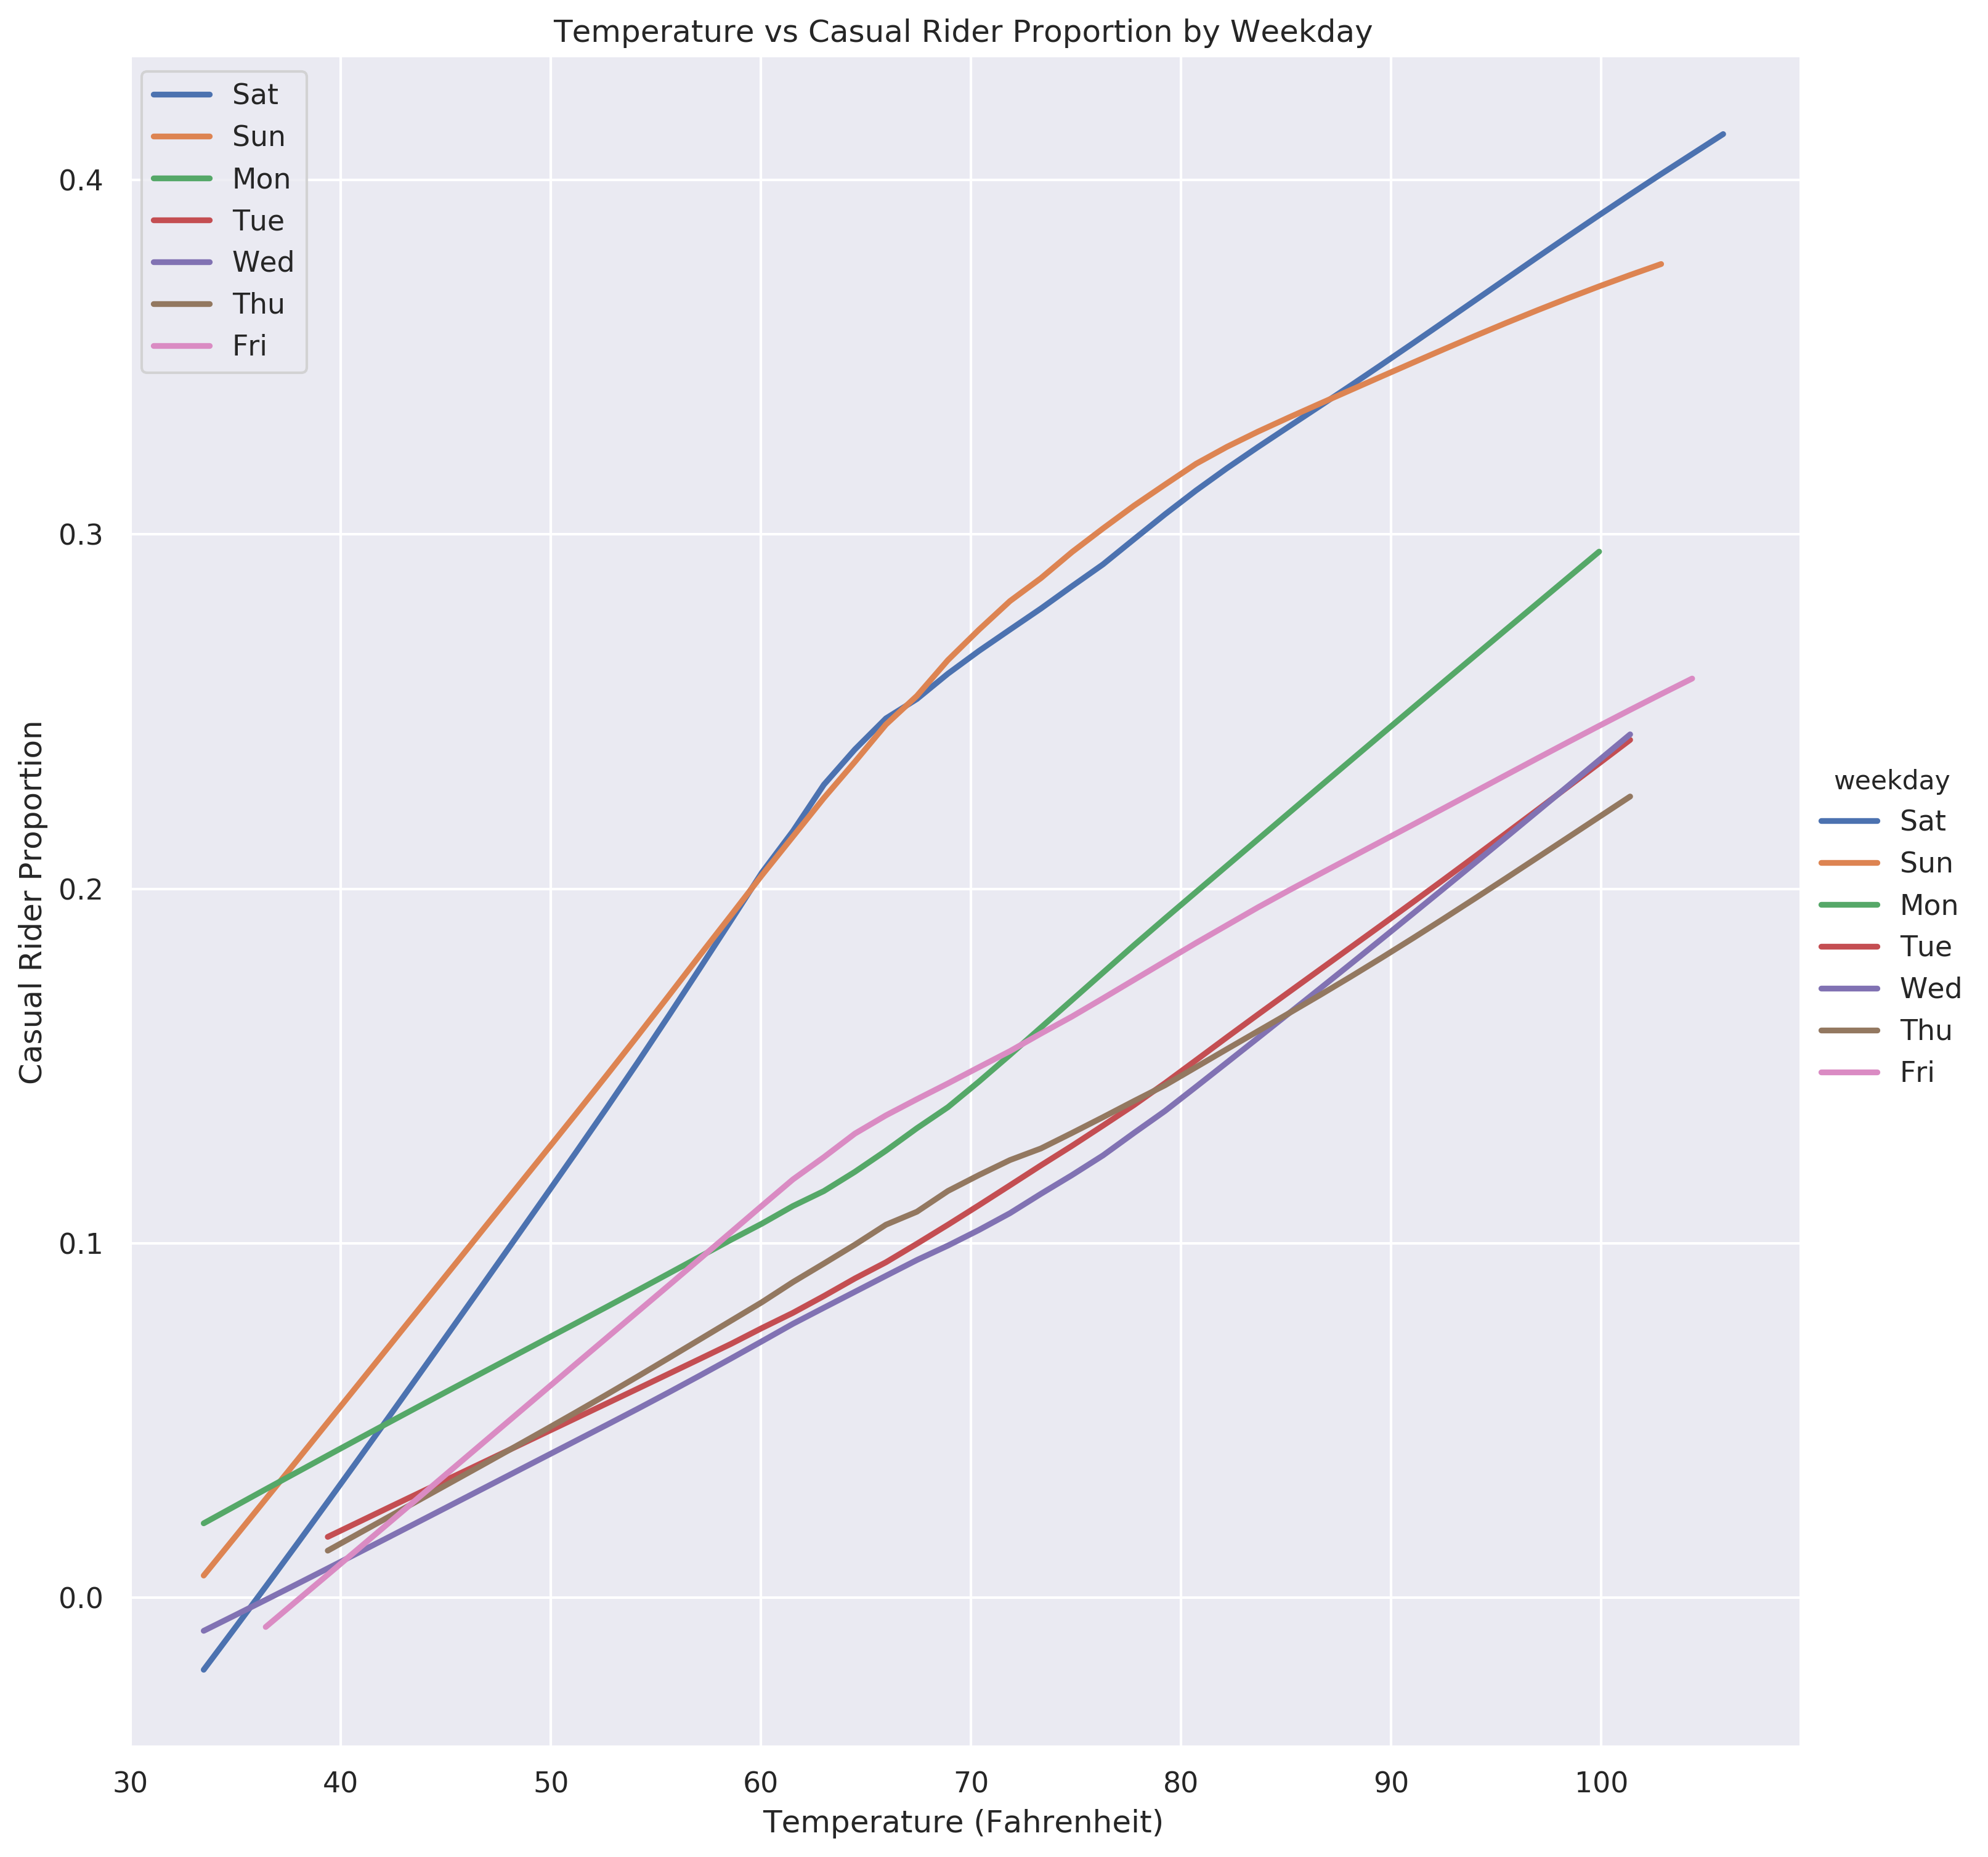

In [38]:
Image(filename=f'{img_path}/curveplot_temp_prop_casual.png', embed=True, height=10, width=700)

You should start by plotting one of seven curves. 

- You must convert the temperature to Farenheit. Note that the [description of dataset](#q0) indicate the values in `temp` have been scaled to lie in the range 0 to 1 through division by 41. You must multiply by 41 before converting between Celsius and Farenheit with the formula 

$$\text{Farenheit} = \frac{9}{5} \text{ Celsius } + 32$$

- Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to generate the chart 
    * Set `scatter = False` to remove the scatter-plot
    * Try setting ```lowess = True``` for a better fit to the trends over the 7 curves. This will allow the curves to wiggle between points. 

After you can produce the chart for one curve, try combining the data to produce a chart for all seven curves. 

- Set `hue = "weekday"` to have the lines separated by day of the week

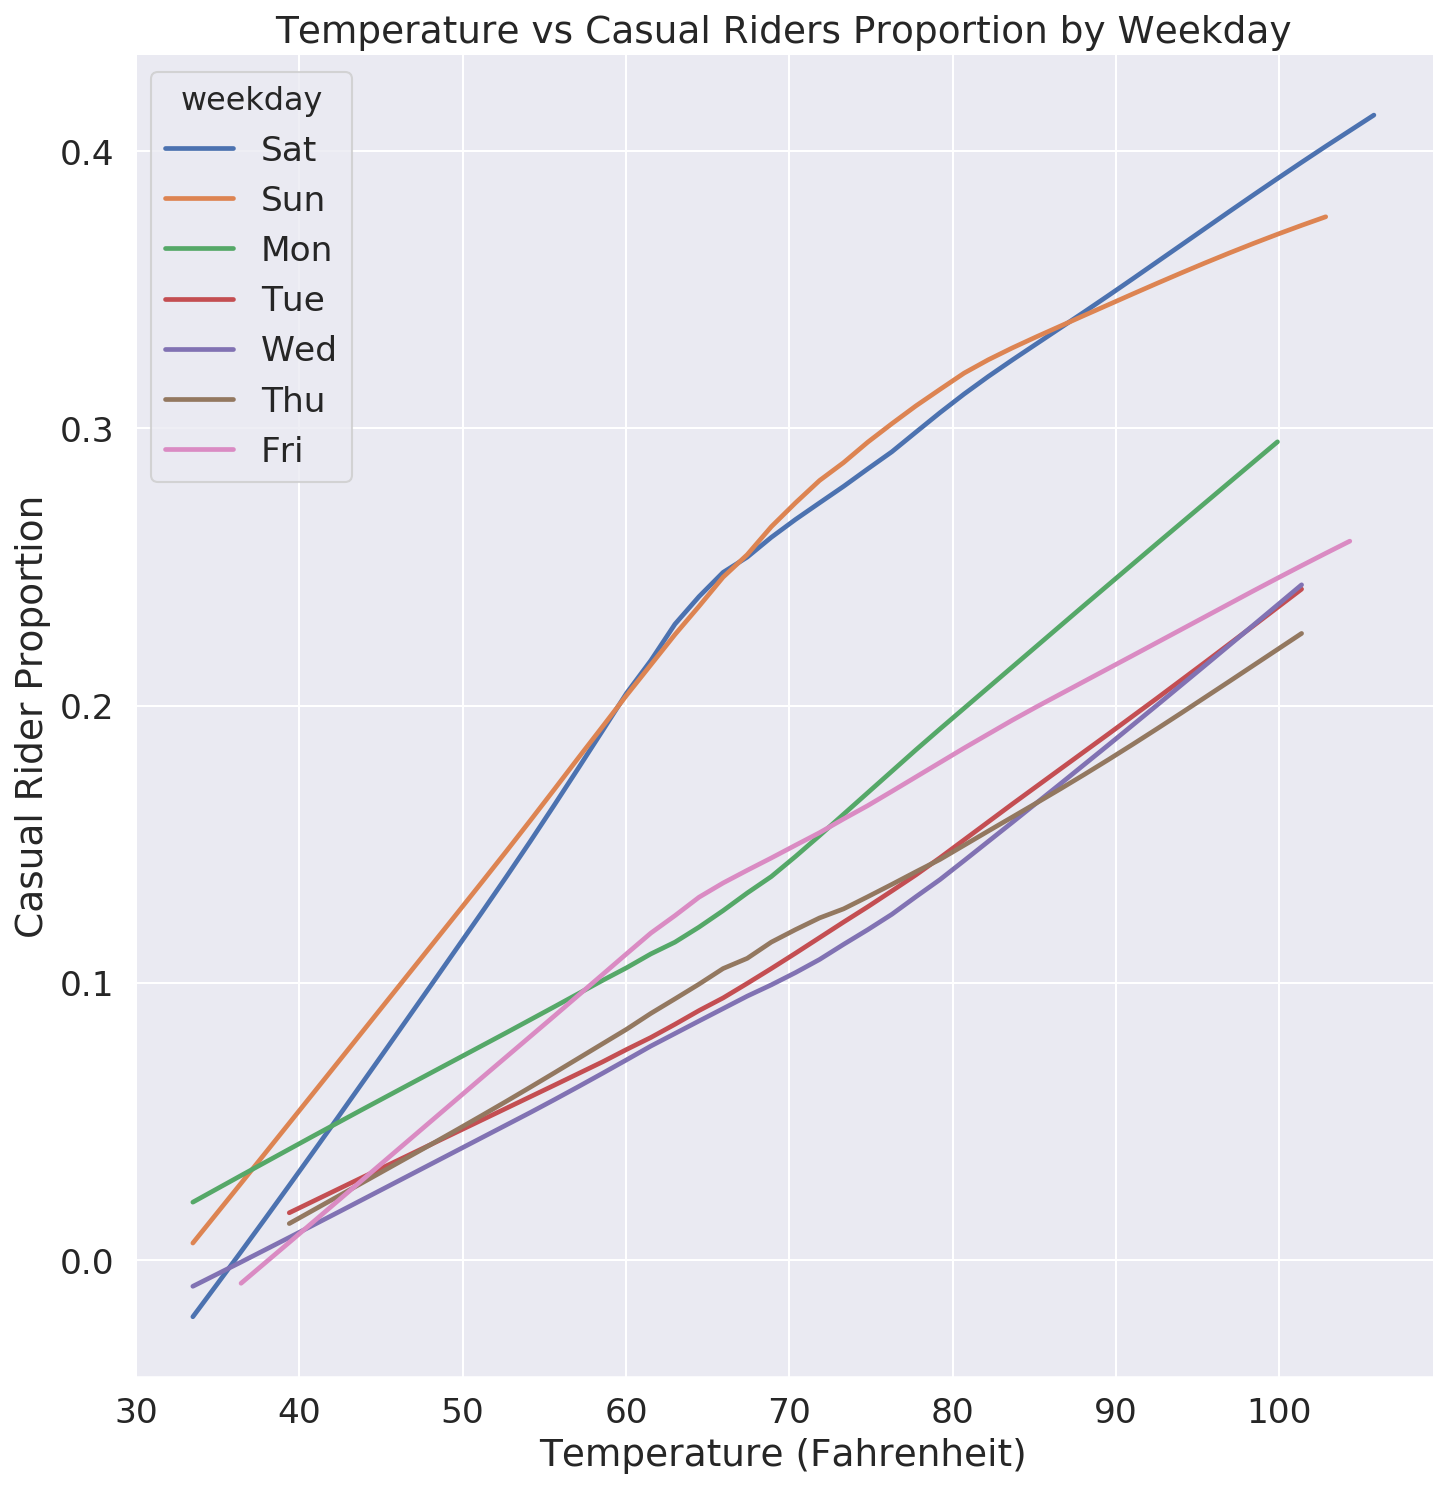

In [39]:
# curves for each day of the week
#Convert decimal celsius to farenheit
bike["F"] = ((bike['temp'] * 41) * 9 / 5) + 32
#plot
ax = sns.lmplot(x = 'F', 
                y = 'prop_casual', 
                data = bike, 
                hue = 'weekday', 
                scatter = False, 
                lowess = True, 
                legend = True, 
                legend_out = False,
               height = 10)
ax.set(xlabel = 'Temperature (Fahrenheit)',
                         ylabel ='Casual Rider Proportion', 
                         title = 'Temperature vs Casual Riders Proportion by Weekday')

# YOUR CODE HERE
#raise NotImplementedError()

#### Question 5c
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

In [40]:
q5c = {
    'as the temperature increases, proportion of casual riders': 'increases',
    'weekends have more/less/same proportion of casual riders': 'more'
}

# YOUR CODE HERE
#raise NotImplementedError()

In [41]:
# TESTS
assert q5c['as the temperature increases, proportion of casual riders'] in [
    'increases', 'decreases', "doesn't change"]
assert q5c['weekends have more/less/same proportion of casual riders'] in [
    'more', 'less', 'same'
]


## Congrats !

You are finished with HW3. We have covered many components of the `seaborn` package. Please see the [documentation](https://seaborn.pydata.org/) for more information about these charts from the assignment:

- `distplot`
- `lmplot`
- `lineplot`
- `scatterplot`
